## 1.Loading libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

## 2.Loading dataset

In [2]:
df_train = pd.read_csv("TRAIN.csv")
df_test = pd.read_csv("TEST_FINAL.csv")
df_sample = pd.read_csv("SAMPLE.csv")

In [3]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


<AxesSubplot:xlabel='Store_id', ylabel='Sales'>

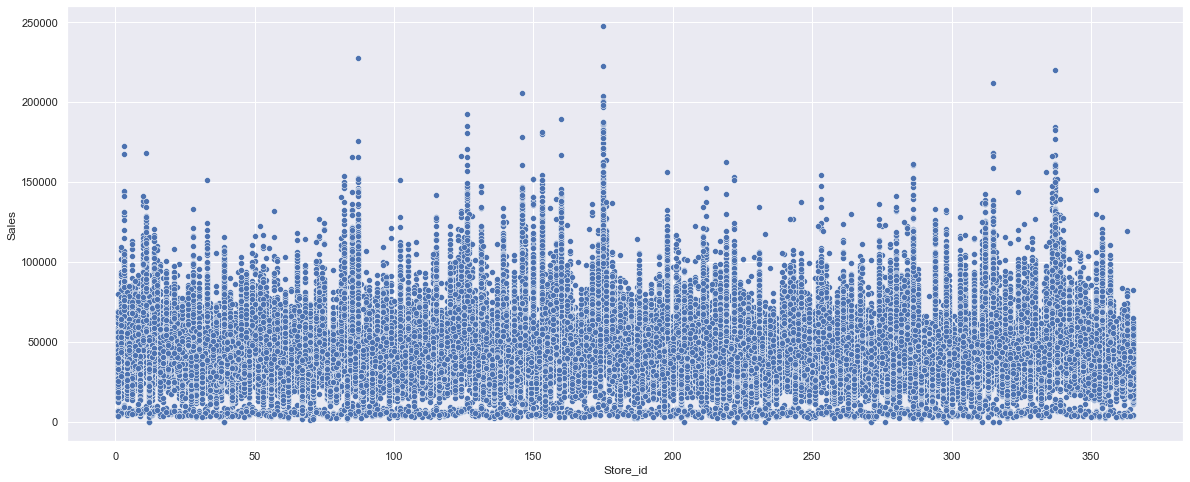

In [4]:
## plotting scatter plot of store id vs sales
plt.figure(figsize=(20,8))
sns.scatterplot(x='Store_id',y = 'Sales',data=df_train)

In [5]:
# Each store done sales for each date, lets check about highest sales of store,whether on which particular date that store is generated maximum sales.
highest_sale_store = df_train[df_train['Store_id']==175]
top_10_days_highest_sale_store = highest_sale_store.sort_values(by = 'Sales',ascending = False).head(10)
top_10_days_highest_sale_store

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
178648,T1178649,175,S4,L2,R1,2019-05-05,0,Yes,371,247215.00
178304,T1178305,175,S4,L2,R1,2019-05-04,0,Yes,348,222516.00
68703,T1068704,175,S4,L2,R1,2018-07-08,0,Yes,333,203337.00
155790,T1155791,175,S4,L2,R1,2019-03-03,0,Yes,347,200742.00
183128,T1183129,175,S4,L2,R1,2019-05-17,0,Yes,309,199839.00
183251,T1183252,175,S4,L2,R1,2019-05-18,1,No,361,197840.61
156109,T1156110,175,S4,L2,R1,2019-03-04,1,No,293,196727.16
182587,T1182588,175,S4,L2,R1,2019-05-16,0,Yes,294,187428.00
128679,T1128680,175,S4,L2,R1,2018-12-19,0,Yes,269,187077.00
136956,T1136957,175,S4,L2,R1,2019-01-11,0,Yes,273,186444.00


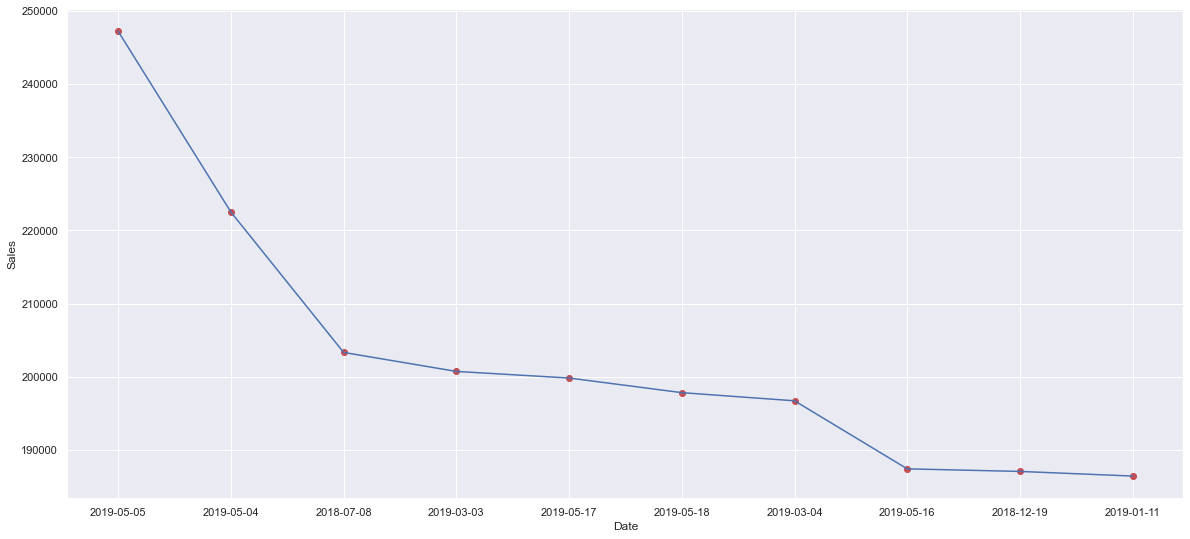

In [6]:
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Date',y = 'Sales',data= top_10_days_highest_sale_store)
plt.scatter(x='Date', y= 'Sales',data =top_10_days_highest_sale_store,  c = 'r')

#### above plot we can see in 2019-5-5 there was maximum sales near about 250000

## 3. Preprocessing of data

In [7]:
np.unique(df_train["Store_Type"])

array(['S1', 'S2', 'S3', 'S4'], dtype=object)

In [8]:
np.unique(df_train["Location_Type"])

array(['L1', 'L2', 'L3', 'L4', 'L5'], dtype=object)

In [9]:
np.unique(df_train["Region_Code"])

array(['R1', 'R2', 'R3', 'R4'], dtype=object)

In [10]:
np.unique(df_train["Discount"])

array(['No', 'Yes'], dtype=object)

In [11]:
#function for converting s1, s2, s3, s4 to 1 ,2 ,3,4

def clean_string(x):
    if x == 'S1':
        return 1
        
    elif x == "S2" :
        return 2
    
    elif x == "S3" :
        return 3
    else:
        return 4

In [12]:
#function for converting l1, l2, l3, l4 ,l5to 1 ,2 ,3,4,5

def location(x):
    if x == 'L1':
        return 1
        
    elif x == "L2" :
        return 2
        
    elif x == "L3" :
        return 3
    
    elif x == "L4" :
        return 4
    else:
        return 5

In [13]:
#function for converting region

def region(x):
    if x == 'R1':
        return 1
        
    elif x == "R2" :
        return 2
        
    elif x == "R3" :
        return 3
    else:
        return 4

In [14]:
#function for discount
def discount(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [15]:
df_train1 = df_train
df_train1['Store_Type'] = df_train1['Store_Type'].apply(clean_string)
df_train1['Location_Type'] = df_train1['Location_Type'].apply(location)
df_train1['Region_Code'] = df_train1['Region_Code'].apply(region)
df_train1['Discount'] = df_train1['Discount'].apply(discount)

In [16]:
df_train1

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,1,3,1,2018-01-01,1,1,9,7011.84
1,T1000002,253,4,2,1,2018-01-01,1,1,60,51789.12
2,T1000003,252,3,2,1,2018-01-01,1,1,42,36868.20
3,T1000004,251,2,3,1,2018-01-01,1,1,23,19715.16
4,T1000005,250,2,3,4,2018-01-01,1,1,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,2,3,2,2019-05-31,1,1,51,37272.00
188336,T1188337,153,4,2,1,2019-05-31,1,0,90,54572.64
188337,T1188338,154,1,3,2,2019-05-31,1,0,56,31624.56
188338,T1188339,155,3,1,2,2019-05-31,1,1,70,49162.41


In [17]:
df_train1.isnull().sum() ## checking null value

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [18]:
# Convert Date column which is a string into datetime object
df_train1["Date"] = pd.to_datetime(df_train1["Date"], format = "%Y-%m-%d")
df_train1

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,1,3,1,2018-01-01,1,1,9,7011.84
1,T1000002,253,4,2,1,2018-01-01,1,1,60,51789.12
2,T1000003,252,3,2,1,2018-01-01,1,1,42,36868.20
3,T1000004,251,2,3,1,2018-01-01,1,1,23,19715.16
4,T1000005,250,2,3,4,2018-01-01,1,1,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,2,3,2,2019-05-31,1,1,51,37272.00
188336,T1188337,153,4,2,1,2019-05-31,1,0,90,54572.64
188337,T1188338,154,1,3,2,2019-05-31,1,0,56,31624.56
188338,T1188339,155,3,1,2,2019-05-31,1,1,70,49162.41


<AxesSubplot:>

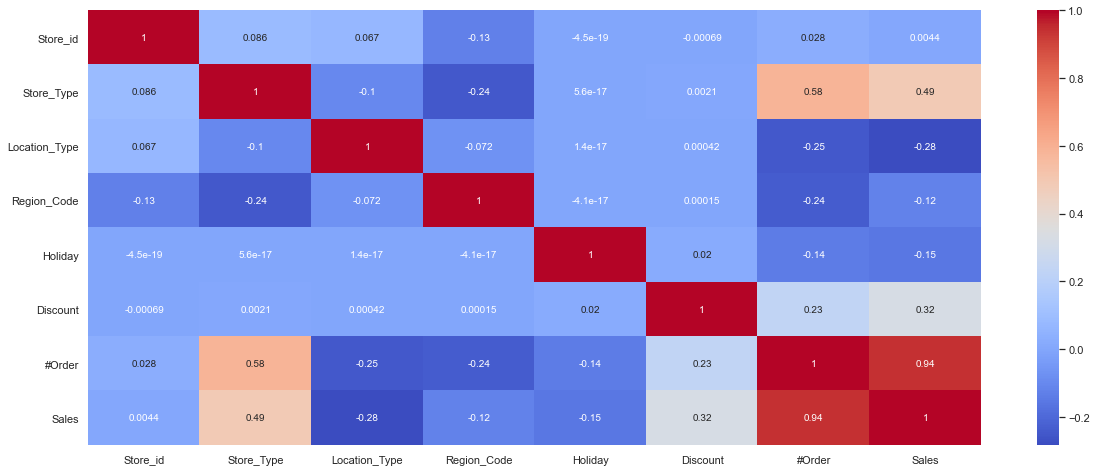

In [19]:
## visulaising using correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(df_train1.corr(),annot=True,cmap='coolwarm')

### from above graph we can see that for sales (store type )affect more which is +0.49 it means if store type better then sales also increases similarly Discount +0.32, location type -0.28,Region code -0.12,holiday  -0.15

In [20]:
## dropping column which dont have any relation on dependent variable
df_train1.drop(['ID','Store_id','Date','#Order'],axis='columns',inplace=True)

In [21]:
df_train1.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,3,1,1,1,7011.84
1,4,2,1,1,1,51789.12
2,3,2,1,1,1,36868.20
3,2,3,1,1,1,19715.16
4,2,3,4,1,1,45614.52


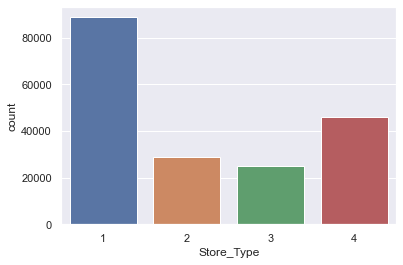

In [22]:
sns.set_style('darkgrid')
sns.countplot(data=df_train1,x='Store_Type')
plt.show()

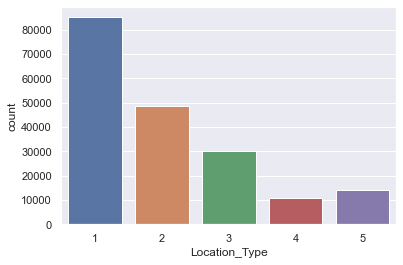

In [23]:
sns.set_style('darkgrid')
sns.countplot(data=df_train1,x='Location_Type')
plt.show()

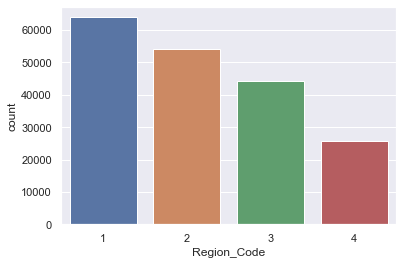

In [24]:
sns.set_style('darkgrid')
sns.countplot(data=df_train1,x='Region_Code')
plt.show()

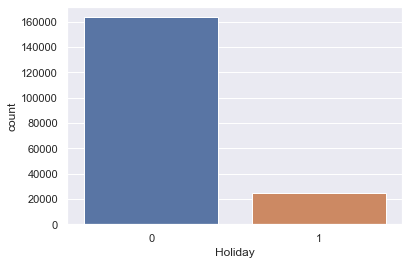

In [25]:
sns.set_style('darkgrid')
sns.countplot(data=df_train1,x='Holiday')
plt.show()

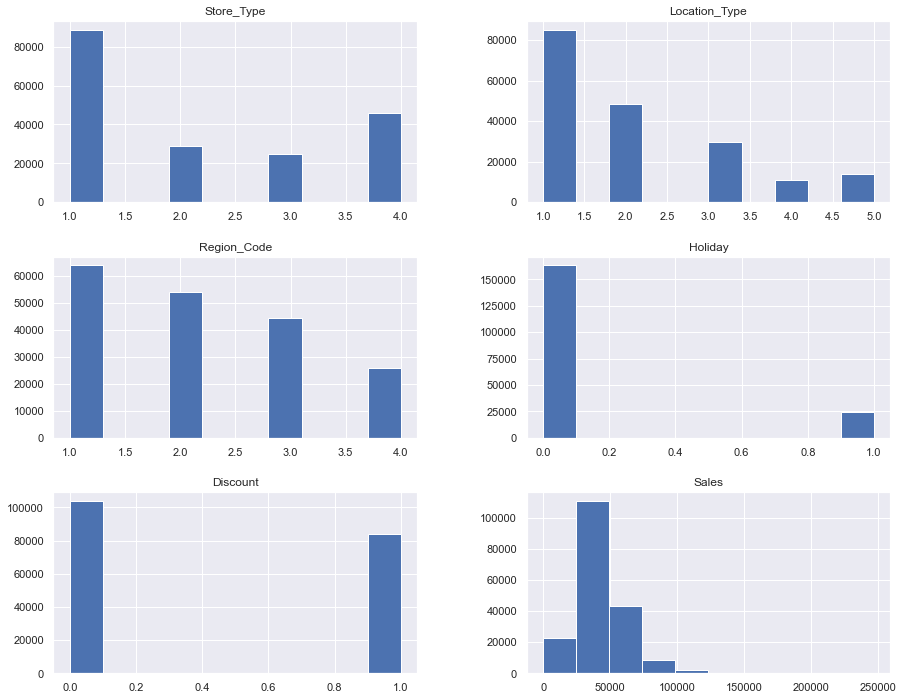

In [26]:
df_train1.hist(bins=10,figsize=(15,12))
plt.show()

<AxesSubplot:ylabel='Sales'>

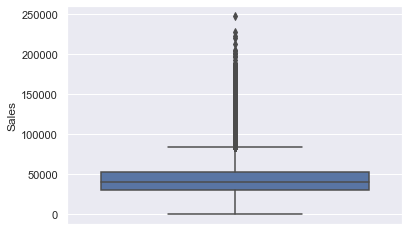

In [27]:
sns.boxplot(y = 'Sales',data = df_train1)

### Above box plot showing mean of sales is 50000

In [28]:
## Seprating independent and dependent variable
inputs = df_train1.drop('Sales',axis='columns')
target = df_train1.Sales

In [29]:
inputs

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,1,3,1,1,1
1,4,2,1,1,1
2,3,2,1,1,1
3,2,3,1,1,1
4,2,3,4,1,1
...,...,...,...,...,...
188335,2,3,2,1,1
188336,4,2,1,1,0
188337,1,3,2,1,0
188338,3,1,2,1,1


In [30]:
target

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

### Now will play with test data

In [31]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [32]:
## dropping column which dont have any relation on dependent variable
df_test.drop(['ID','Store_id','Date'],axis='columns',inplace=True)

In [33]:
df_test.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,S4,L2,R3,0,No
1,S1,L1,R1,0,No
2,S4,L2,R1,0,No
3,S1,L1,R4,0,No
4,S1,L1,R2,0,No


In [34]:
df_test.isnull().sum() ##checking null value

Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
dtype: int64

In [35]:
df_test1 = df_test
df_test1['Store_Type'] = df_test1['Store_Type'].apply(clean_string)
df_test1['Location_Type'] = df_test1['Location_Type'].apply(location)
df_test1['Region_Code'] = df_test1['Region_Code'].apply(region)
df_test1['Discount'] = df_test1['Discount'].apply(discount)

In [36]:
df_test1

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,4,2,3,0,0
1,1,1,1,0,0
2,4,2,1,0,0
3,1,1,4,0,0
4,1,1,2,0,0
...,...,...,...,...,...
22260,2,5,2,0,0
22261,4,2,1,0,0
22262,1,1,3,0,1
22263,1,1,4,0,0


## 4.Selection of machine learning algoritham

### Random Forest is suitable for situations when we have a large dataset
### In the case of random forest, it ensembles multiple decision trees into its final decision.
### Random forest can be used  regression task (predict continuous outputs, such as price) 

## 5. Building Linear Regression Model


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state= 20)

In [39]:
## checking length of x train y train
print(len(X_train),len(y_train),len(X_test),len(y_test))

150672 150672 37668 37668


In [40]:
##Training the Multiple Linear Regression Model on the Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)
score = regressor.score(X_test, y_test)

In [41]:
print(score)

0.424499839803849


## 6. Build Decision tree regressor Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.003,random_state= 20)

In [43]:
## checking length of x train y train
print(len(X_train),len(y_train),len(X_test),len(y_test))

187774 187774 566 566


In [44]:
## fitting Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor()
regressor1.fit(X_train, y_train)
y_pred = regressor1.predict(X_test)
score = regressor1.score(X_test, y_test)

In [45]:
print(score)

0.5346631091124641


## 7. Build Random forest regressor Model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.05,random_state= 20)

In [47]:
## fitting Random forest regressor Model
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators = 10, random_state= 0)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)
score = regressor2.score(X_test, y_test)

In [48]:
print(score)

0.5714060428259349


## 8. Applying for test dataset

In [49]:
regressor1.fit(inputs,target)

DecisionTreeRegressor()

In [50]:
## Predicting model with test dataset
pred=regressor1.predict(df_test1)

In [51]:
df_sample.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [52]:
df_sample=pd.DataFrame({"ID": df_sample["ID"],"Sales":pred})

In [53]:
df_sample

,ID,Sales
0,T1188341,51970.666329
1,T1188342,33361.146893
2,T1188343,60844.828645
3,T1188344,35273.215754
4,T1188345,34982.214953
...,...,...
22260,T1210601,22127.083939
22261,T1210602,60844.828645
22262,T1210603,48105.505805
22263,T1210604,35273.215754


In [54]:
## making sample file
df_sample.to_csv('df_final_analytics.csv',index=False)

## Conclusion - In this Supplement sales prediction problem with help of Decision Tree Regressor we 57.14962029123236% accuracy.